<a href="https://colab.research.google.com/github/de-developer-1/ml_study/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#######################################
# dataset
#######################################
import pandas as pd
df = pd.read_csv("data.csv")

In [7]:
#######################################
# mapping
#######################################
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5,
}
# mapを用いることで辞書に基づいた値変換ができる
df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [9]:
#######################################
# split
#######################################
df = df.sample(frac = 1).reset_index(drop = True)
df_train = df.head(1000)
df_test = df.tail(599)

In [13]:
#######################################
# trial 1
#######################################
from sklearn import tree
from sklearn import metrics

#　決定木
clf = tree.DecisionTreeClassifier(max_depth=3)
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

clf.fit(df_train[cols],df_train.quality)

train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(
    df_train.quality,train_predictions
)

test_accuracy = metrics.accuracy_score(
    df_test.quality,test_predictions
)

In [15]:
#######################################
# trial 2
#######################################
from sklearn import tree
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('xtick',labelsize = 20)
matplotlib.rc('ytick',labelsize = 20)

%matplotlib inline

train_accuracies = [0.5]
test_accuracies = [0.5]

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

for depth in range(1,25):
  clf = tree.DecisionTreeClassifier(max_depth=depth)
  clf.fit(df_train[cols],df_train.quality)
  train_predictions = clf.predict(df_train[cols])
  test_predictions = clf.predict(df_test[cols])
  train_accuracy = metrics.accuracy_score(
      df_train.quality,train_predictions
      )
  test_accuracy = metrics.accuracy_score(
      df_test.quality,test_predictions
      )
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)


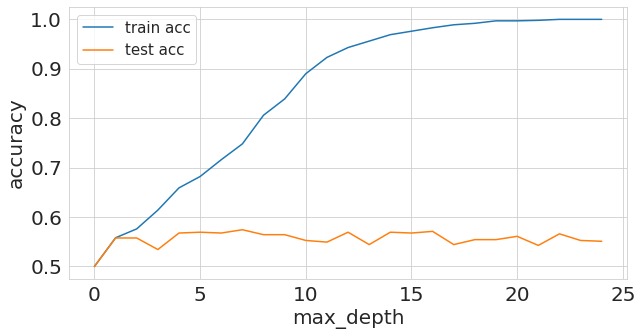

In [18]:
#######################################
# 可視化
#######################################
plt.figure(figsize = (10,5))
sns.set_style("whitegrid")

plt.plot(train_accuracies,label = "train acc")
plt.plot(test_accuracies,label = "test acc")
plt.legend(loc = "upper left",prop = {'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth",size = 20)
plt.ylabel("accuracy",size = 20)
plt.show()